## Importing libraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Editable params

In [105]:
Tl2 = 43.3
Tl1 = 29.4
G = 1.356
L = 1.356
slope = -41.87 # * 10^3
H = 0.0165
KG = 1.207e-7
P = 1.013e5

## Non-editable params

In [106]:
step = 0
x = Tl1
cl = 4.187
MB = 29
equilibrium_x = np.array([15.6, 26.7, 29.4, 32.2, 35, 37.8, 40.6, 43.3, 46.1, 60])
equilibrium_y = np.array([43.68, 84, 97.2, 112.1, 128.9, 148.2, 172.1, 197.2, 224.5, 461.5])
lines = 6

## Equations and functions

In [107]:
h = G/(MB*KG*P)

Hy1 = np.round(((1.005 + 1.88*H) * (Tl1) + 2501*H), 1)
Hy2 = ((L*cl*(Tl2-Tl1))/G) + Hy1

m_operation = ((Hy2-Hy1)/(Tl2-Tl1))
b_operation = Hy2-(m_operation*Tl2)

z = np.polyfit(equilibrium_x, equilibrium_y, 3)
equilibrium_x_ = np.arange(15.6, 60, 0.00025)

p = np.poly1d(z)
equilibrium_y_ = np.round(p(equilibrium_x_), 3)
b_int = Hy1- slope*Tl1

def y_op(x, m_operation=m_operation, b_operation=b_operation):
    return np.round(m_operation*x + b_operation, 10)

def y_int(x_, slope=slope, step=step):
    return np.round(slope*(x_-step-x) + y_op(x), 10)

## Draw Equilibrium curve and Operation line and Deriving force lines

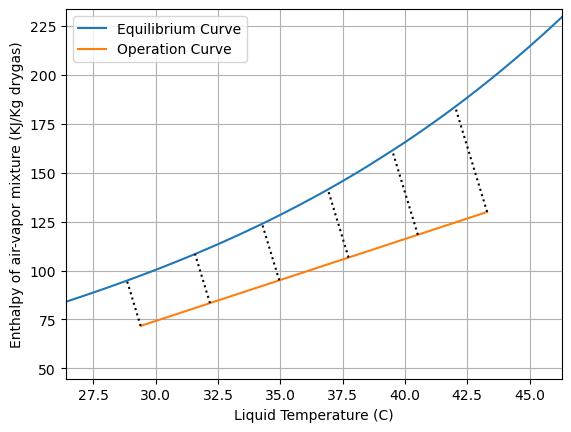

In [108]:
plt.plot(equilibrium_x_, equilibrium_y_, label="Equilibrium Curve")
plt.plot(np.array([Tl1, Tl2]), np.array([Hy1, Hy2]), label="Operation Curve")
integeration = pd.DataFrame(columns=["Hyi", "Hy"])
Hyi_list = []
Hy_list = []
for i, x in enumerate(np.linspace(Tl1, Tl2, 6)):
    y_op_ = y_op(x)
    step = i*((Tl2-Tl1)/5)
    x_list = []
    y_int_list = []
    p_list = []
    error_list = []

    for  x_ in np.arange(Tl1-10, Tl2, 0.01):
        x_list.append(x_)
        y_int_list.append(y_int(x_))
        p_list.append(p(x_))
    x_array = np.array(x_list)
    y_int_array = np.array(y_int_list)
    p_array = np.array(p_list)
    error_array = np.abs(y_int_array-p_array)
    trials = pd.DataFrame(
        {
            "X_": x_array,
            "error_array": error_array
        }
    )
    x_ = trials.sort_values(by="error_array").head(1)["X_"].item()
    win = y_int(x_)
    plt.plot([x, x_], [y_op_, win], linestyle="dotted", color="black")
    Hyi_list.append(win)
    Hy_list.append(y_op_)
integeration["Hyi"] = Hyi_list
integeration["Hy"] = Hy_list
plt.xlabel("Liquid Temperature (C)")
plt.ylabel("Enthalpy of air-vapor mixture (KJ/Kg drygas)")
plt.xlim(Tl1-3, Tl2+3)
plt.ylim(integeration["Hyi"].min()-50, integeration["Hyi"].max()+50)
plt.grid()
plt.legend();

## Performing numerical integeration and drawing its table (Trapazoidal method)

In [109]:
integeration["1/Hyi-Hy"] = 1 / (integeration["Hyi"]-integeration["Hy"])
integeration["Hy-1"] = integeration["Hy"].shift(1)
integeration["1/Hyi-Hy-1"] = integeration["1/Hyi-Hy"].shift(1)
integeration["area"] = (integeration["Hy"]-integeration["Hy-1"])*0.5*(integeration["1/Hyi-Hy"]+integeration["1/Hyi-Hy-1"])
integeration = integeration.fillna(0)
integeration

,Hyi,Hy,1/Hyi-Hy,Hy-1,1/Hyi-Hy-1,area
0,94.72850,71.70000,0.043424,0.00000,0.000000,0.000000
1,108.46186,83.33986,0.039806,71.70000,0.043424,0.484394
2,123.87002,94.97972,0.034614,83.33986,0.039806,0.433116
3,141.37168,106.61958,0.028775,94.97972,0.034614,0.368919
4,161.38554,118.25944,0.023188,106.61958,0.028775,0.302421
5,183.49290,129.89930,0.018659,118.25944,0.023188,0.243545


### Calculate height of Cooling-tower

In [110]:
num = integeration["area"].sum()
print(f"Height of the Cooling-tower = {h*num:.2f} m")

Height of the Cooling-tower = 7.01 m
